<center><b>Final Project</b></center>

Project Overview:

The purpose of this project is to see the relationship between life expectancy and happiness score in different countries across the world. Economic theory suggests that more developed countries have higher life expectancy, but does this matter if the people are not happy? That is why this project focuses on the relationship between the two variables and we will use general correlation and linear regression analysis to test if living longer can indicate some relationship to the quality of life in one's own opinion. We will also see if other variables are relevant to this discussion, and if they are, we'll test them out as well! Perhaps life expectancy won't be the strongest indicator of happiness.


Project Structure:

We will begin the project by going importing the data, acesssing the information, and performing any premliminary data transformations to ensure that we don't run into errors. 

Next, we will provide summary statistics about the variables. Then we will graph the variables against the happiness score for visual understanding and to determine if life expectancy and other factors contribute to happiness.

After this, we will go over our assumptions for the linear regression model and what we expect to see in the predicted results. We will run the regression, analyze the output, and provide thoughts on the relationship between the response and explanatory variables, accounting for possible reasons for the coefficient values, errors in our analysis, and what information it tells us. 

Data Report:

The data we use for this project comes from the online data science community platform, Kaggle. Kaggle is an open source hub where people can import datasets and projects to solve real world problems that companies or professional entities face. In our case, the Sustainable Development Solutions Network provided a report on world happiness. To access this data, click this link: https://www.kaggle.com/unsdsn/world-happiness.

Key Variables:

The 2 key variables we use in this project are life expectancy (explanatory variable) and happiness score (response variable). However, we may run into other important variables such as GDP per capita or social support, which may also provide useful information. So, we end up with 3 variables.

We'd also like to note that the quantitative values provided in the dataset are not completely straightforward. As the data description states, "The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others." Therefore, our explanatory variables act to increase the happiness score based on a Cantril Ladder, which essentially means 0 is the worst possible life and 10 is the best possible life. We will use our explanatory variables with caution and see whether or not life expectancy and happiness either have a positive, negative, or negligent relationship with each other. We will also include a model with GDP per capita and see if the beta coefficients for the explanatory variables are significant. 

Having said that, the variables are defined as:

<b>Health Life Expectancy:</b> the extent to which people's perceptions on Life expectancy contributed to the calculation of the Happiness Score

<b>GDP Per Capita:</b> The extent to which people's perceptions on GDP per person contributes to the calculation of the Happiness Score

<b>Social Support:</b> The extent to which people's perceptions on social support contributes to the calculation of the Happiness Score

<b>Happiness Score:</b> A metric measured by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."


In [2]:
# Key Imports

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [3]:
# Access Data

# note: download the file locally and change the path name accordingly to read the data
path="/Users/katman/Documents/Senior Courses/Econ 149/project1/World Happiness Data/2019.csv"

data = pd.read_csv(path, parse_dates=True)
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
data.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [5]:
# Summary Statistics
data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


### We will now plot the column variables against Happiness Score.

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')


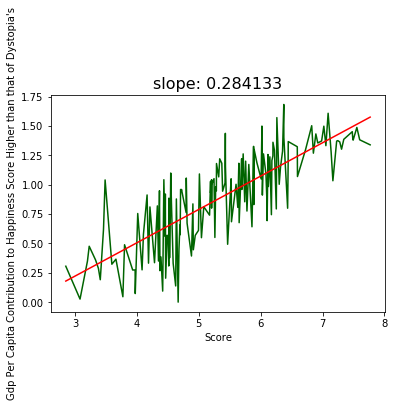

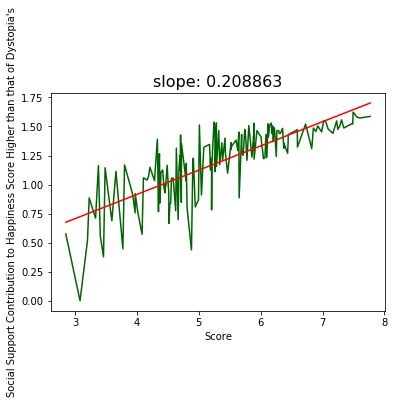

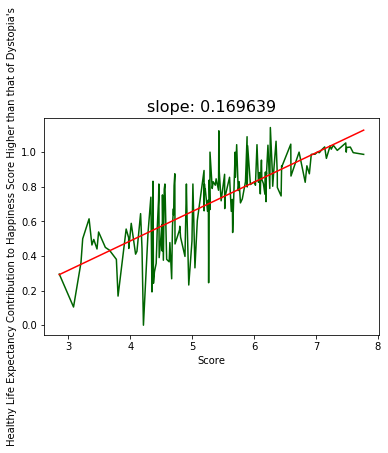

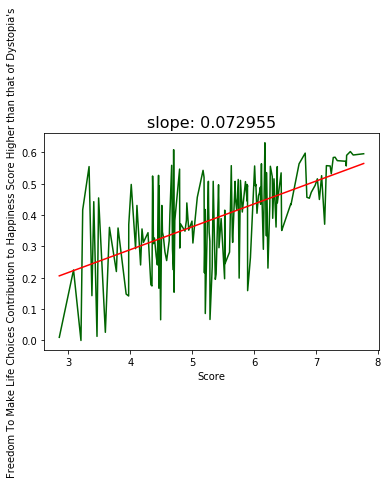

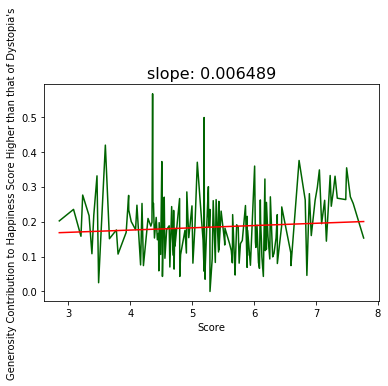

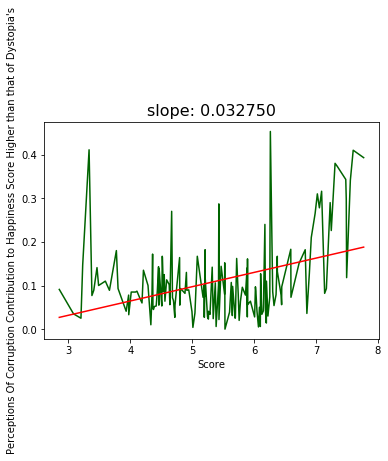

<Figure size 432x288 with 0 Axes>

In [6]:
from matplotlib import pyplot as plt
from numpy.polynomial.polynomial import polyfit

columns = data.columns
print(columns) 
x = data['Score']

for i in columns[3:]:
    plt.plot(x, data[i], color='darkgreen')
    plt.xlabel('Score')
    plt.ylabel(f"{i.title()} Contribution to Happiness Score Higher than that of Dystopia's")
    m, b = np.polyfit(x, data[i], 1)
    plt.plot(x, m*x + b, color='red')
    plt.title("slope: %f" % m, fontsize=16)
    plt.show() 
    
plt.tight_layout()

In [7]:
# slope values for each variable 
for i in columns[3:]:
    m, b = np.polyfit(x, data[i], 1)
    print(f'{i}', m)

GDP per capita 0.28413343366803884
Social support 0.2088625084784605
Healthy life expectancy 0.1696388966517049
Freedom to make life choices 0.07295542781233315
Generosity 0.006488558723892718
Perceptions of corruption 0.032750313808121316


#### We can see that GDP per capita, social support, and life expectancy have the largest slopes, so as the happiness score increases by 1, the GDP per capita contributes 0.284 more points relative to Dystopia, social support contributes 0.209 more points, and life expectancy contributes to 0.17 more points, on average. Since these are the variables that have the largest jumps in point contribution to the score, we will run regression analyses on these variables later on. 

### Now taking a look at the correlation matrix plot to confirm whether or not these 3 variables pinpointed have a linear relationship with score. 

AttributeError: module 'seaborn' has no attribute 'plt'

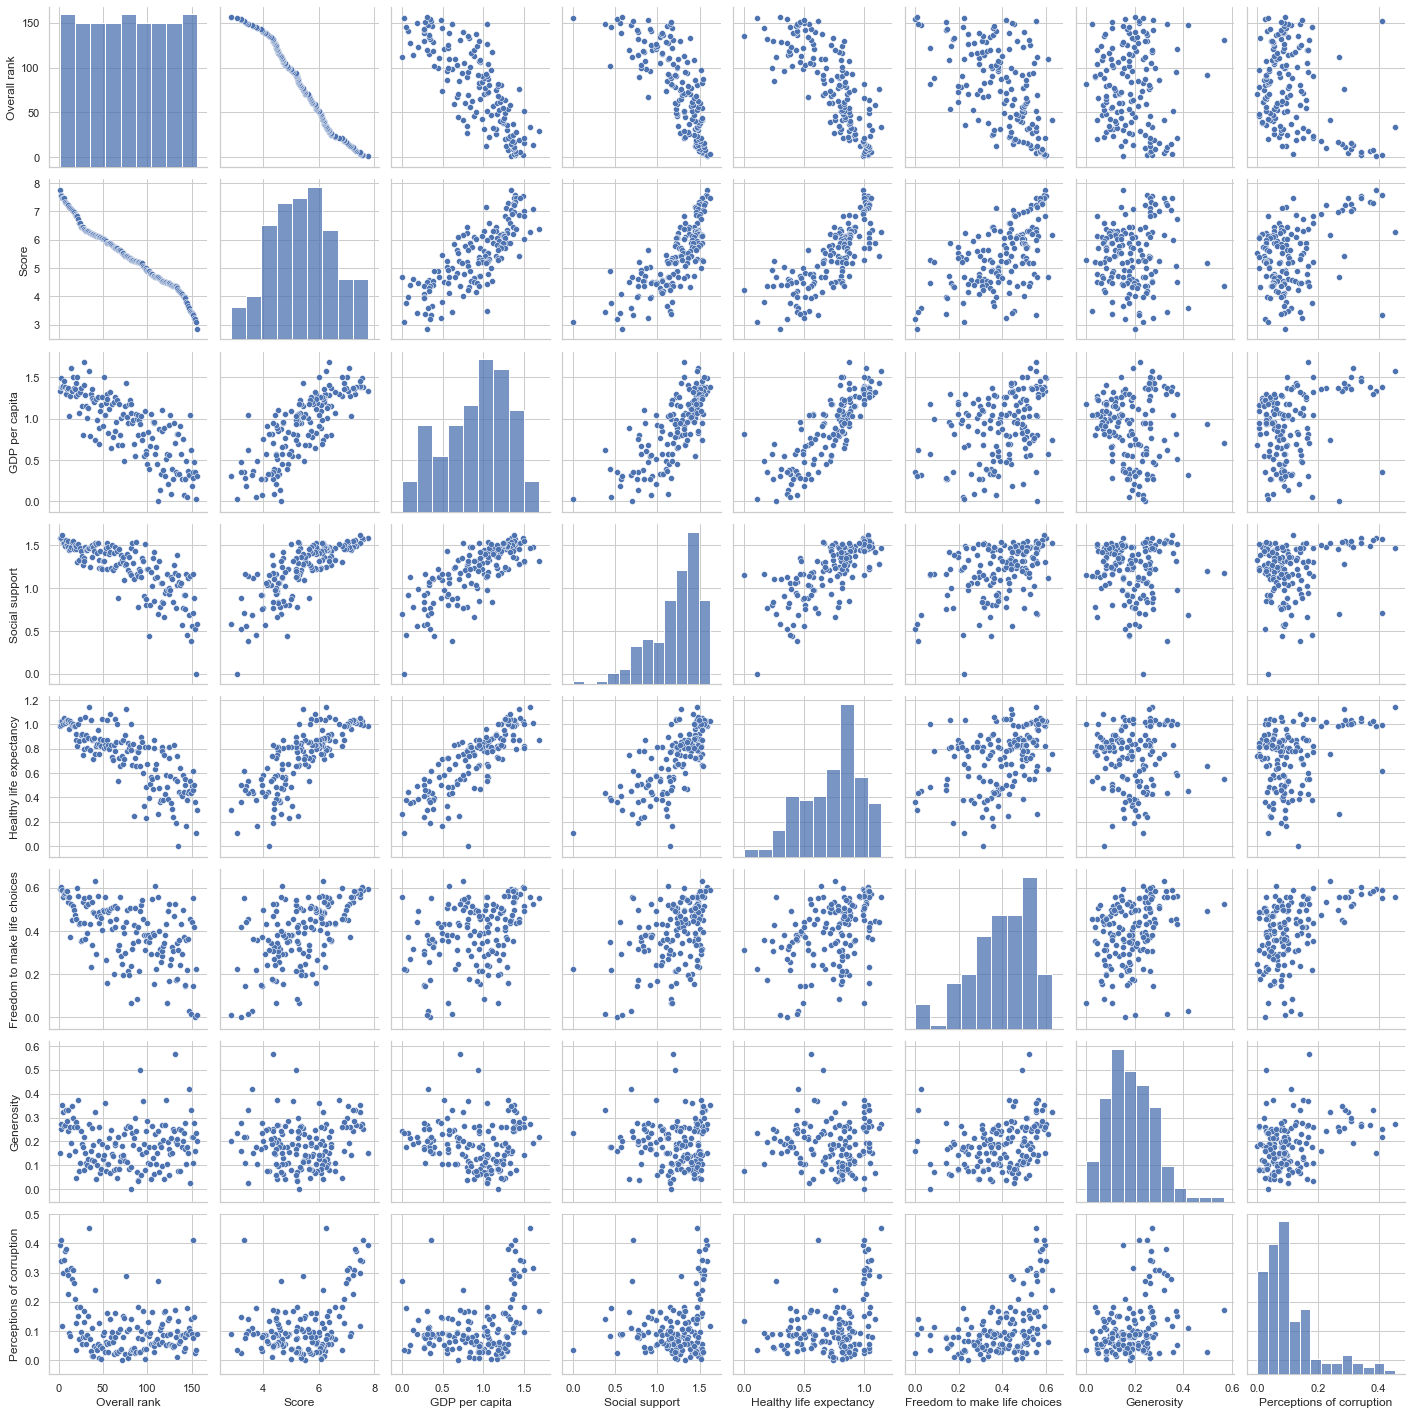

In [81]:
# Basic correlogram
sns.pairplot(data)
sns.plt.show()

#### Indeed, they do! As the score goes up, so does the contrbution from these variables. The other variables don't have linear scatterplots, so they don't have linear increases in contribution, so we will not focus on them.

### Regression Analysis:

We will use the regression analysis to see how each of our three top variables affects happiness score. We predict to see positive coefficient values, since we know that as a person's opinion on one of these variables is higher, so too  will the overall happiness score of the country, since we've already determined that they have positive relationships. 

In [8]:
# for GDP per capita on Happiness Score

reg1 = sm.OLS(data["Score"], data["GDP per capita"])
results = reg1.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Score   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              1880.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):                    1.43e-88
Time:                        15:25:46   Log-Likelihood:                         -287.01
No. Observations:                 156   AIC:                                      576.0
Df Residuals:                     155   BIC:                                      579.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [9]:
# for Social Support on Happiness Score

reg2 = sm.OLS(data["Score"], data["Social support"])
results2 = reg2.fit()
print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Score   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              6615.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):                   4.92e-129
Time:                        15:25:47   Log-Likelihood:                         -193.26
No. Observations:                 156   AIC:                                      388.5
Df Residuals:                     155   BIC:                                      391.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [10]:
# for Life Expectancy on Happiness Score

reg3 = sm.OLS(data["Score"], data["Healthy life expectancy"])
results3 = reg3.fit()
print(results3.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Score   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              3570.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):                   6.37e-109
Time:                        15:25:47   Log-Likelihood:                         -239.86
No. Observations:                 156   AIC:                                      481.7
Df Residuals:                     155   BIC:                                      484.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

### Analysis of the results

We were correct in that the coefficient values for each variable is positive, and the p-values tell us that all of these variables are significant in the model for predicting Happiness Score. However, there is a big problem. The R-squared values are very high, which usually indicates a strong explanation of the variance, but it also tells us that we may be facing a problem of multicollinearity. We already knew that as a variable's point contribution increases, so too should the overall happiness score, and since there's already an existing positive linear relationship between the response and explanatory variable for all three or our explanatory variables, the regression predictions aren't telling us anything valuable beyond what we discovered in the correlation matrix plots. The coefficients, however, could be helpful, but the interpretation is not as straightforward as we usually see in simple models like these. Like we mentioned in the project overview, all these point contributions are relative to the hypothetical place called Dystopia, which has the lowest average scores across all variables. Having said that, this means that for every 1 point increase in the explanatory variables' (GDP per capita, social support, and life expectancy) contribution to the happiness score, RELATIVE TO DYSTOPIA'S SCORE, the response variable (Happiness Score) will increase by 5.3675, 4.3823, and 7.0697, respectively, RELATIVE TO DYSTOPIA. 

What does this tell us?

It tells us that, on average, people in the happiest countries will have the highest perceptions toward GDP per capita, social support, and life expectancy. It doesn't directly indicate that this is what makes people happy, but it hints that their views on these three variables will have the greatest impact on the country's overall happiness score, moreso than the other variables, RELATIVE to Dystopia. And what does this really mean? It means that these variables are more clear-cut; people are more certain that having more of these variables leads to more happiness, and variables such as generosity or corruption are more ambiguous and don't point in one direction the happier a country becomes. 

In [11]:
# regression output values for all the variables

from scipy.stats import linregress
for i in data.columns[3:]:
    slope, intercept, r_value, p_value, std_err = linregress(data["Score"], data[i])
    print(f'{i}\n', "", "slope: %f" % slope)
    print(" ","intercept: %f" % intercept)
    print(" ","R-squared: %f" % r_value**2)
    print(" ","p-value: %f" % p_value)
    print(" ","standard error: %f" % std_err, "\n")

GDP per capita
  slope: 0.284133
  intercept: -0.631189
  R-squared: 0.630250
  p-value: 0.000000
  standard error: 0.017537 

Social support
  slope: 0.208863
  intercept: 0.079474
  R-squared: 0.603819
  p-value: 0.000000
  standard error: 0.013633 

Healthy life expectancy
  slope: 0.169639
  intercept: -0.192010
  R-squared: 0.608218
  p-value: 0.000000
  standard error: 0.010971 

Freedom to make life choices
  slope: 0.072955
  intercept: -0.001907
  R-squared: 0.321196
  p-value: 0.000000
  standard error: 0.008546 

Generosity
  slope: 0.006489
  intercept: 0.149762
  R-squared: 0.005749
  p-value: 0.346820
  standard error: 0.006876 

Perceptions of corruption
  slope: 0.032750
  intercept: -0.066482
  R-squared: 0.148697
  p-value: 0.000001
  standard error: 0.006315 



In [13]:
# To check our multicollinearity assumption about the explanatory variables, let's check their correlations. 

correlationAll = data.corr()[data.columns[2:]]
print(correlationAll)

                                 Score  GDP per capita  Social support  \
Overall rank                 -0.989096       -0.801947       -0.767465   
Score                         1.000000        0.793883        0.777058   
GDP per capita                0.793883        1.000000        0.754906   
Social support                0.777058        0.754906        1.000000   
Healthy life expectancy       0.779883        0.835462        0.719009   
Freedom to make life choices  0.566742        0.379079        0.447333   
Generosity                    0.075824       -0.079662       -0.048126   
Perceptions of corruption     0.385613        0.298920        0.181899   

                              Healthy life expectancy  \
Overall rank                                -0.787411   
Score                                        0.779883   
GDP per capita                               0.835462   
Social support                               0.719009   
Healthy life expectancy                      1.0

We can see that the three explanatory variables have correlation values of 0.7 or greater, indicating possible multicollinearity. 

Let's confirm this visually. 

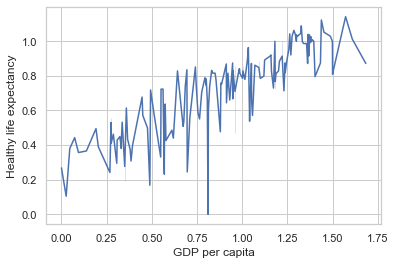

In [14]:
# GDP per capita and Life Expectancy

import seaborn as sns
sns.set_theme(style="whitegrid")


sns.lineplot(x="GDP per capita", y="Healthy life expectancy",
             data=data)

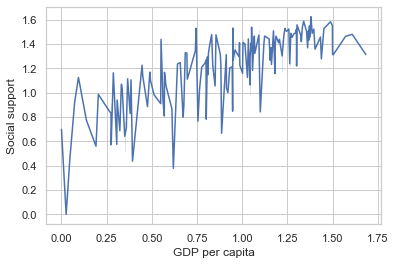

In [16]:
# GDP per capita and Social Support

import seaborn as sns
sns.set_theme(style="whitegrid")


sns.lineplot(x="GDP per capita", y="Social support",
             data=data)

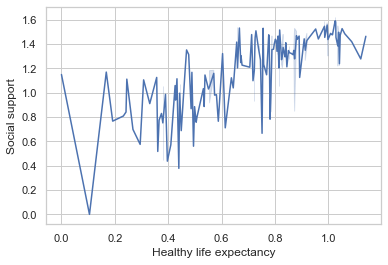

In [17]:
# Life Expectancy and Social Support

import seaborn as sns
sns.set_theme(style="whitegrid")


sns.lineplot(x="Healthy life expectancy", y="Social support",
             data=data)

What do these plots tell us?

That perceptions of GDP per capita, social support, and life expectancy have a positive linear relationship, on average. 

Does this affect our understanding of the increase in happiness score?

Yes, it clarifies that people's perceptions are linear and consistent, on average, for these three factors. 